In [ ]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('/content/vgames2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 결측치 제거
df = df.dropna()

In [ ]:
df.shape

(16241, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
# NA_Sales 라는 실수형 데이터에 문자가 들어가있는지 들어있다면 어떤 문자가 얼만큼있는지 확인
df['NA_Sales'].str.extract(r'([A-Z]+)').dropna().value_counts()

M    97
K    94
dtype: int64

In [ ]:
# EU_Sales 라는 실수형 데이터에 문자가 들어가있는지 들어있다면 어떤 문자가 얼만큼있는지 확인
df['EU_Sales'].str.extract(r'([A-Z]+)').dropna().value_counts()

K    98
M    97
dtype: int64

In [ ]:
# JP_Sales 라는 실수형 데이터에 문자가 들어가있는지 들어있다면 어떤 문자가 얼만큼있는지 확인
df['JP_Sales'].str.extract(r'([A-Z]+)').dropna().value_counts()

K    98
M    98
dtype: int64

In [ ]:
# Other_Sales 라는 실수형 데이터에 문자가 들어가있는지 들어있다면 어떤 문자가 얼만큼있는지 확인
df['Other_Sales'].str.extract(r'([A-Z]+)').dropna().value_counts()

M    100
K     97
dtype: int64

## 나는 이 컬럼들의 기본단위가 "M"이라고 생각했다. 따라서 1M = 1000K이다.
## 함수에 들어간 컬럼의 값들중 마지막글자가 "M" 또는 "K"인 값을 찾아서 "M"은 없애고, "K"는 없앤뒤 0.001을 곱하는 과정을 거치는 함수를 만들었다.

In [ ]:
def trans(x):
  for i in range(x.shape[0]):
    if x.iloc[i][-1] == 'M':
      x.iloc[i] = x.iloc[i][:-1]
    elif x.iloc[i][-1] == 'K':
      x.iloc[i] = float(x.iloc[i][:-1])
      x.iloc[i] = x.iloc[i] * 0.001
  return x

In [ ]:
df['NA_Sales'] = trans(df['NA_Sales'])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['EU_Sales'] = trans(df['EU_Sales'])

In [ ]:
df['JP_Sales'] = trans(df['JP_Sales'])

In [ ]:
df['Other_Sales'] = trans(df['Other_Sales'])

In [ ]:
df['NA_Sales'] = df['NA_Sales'].astype('float')
df['EU_Sales'] = df['EU_Sales'].astype('float')
df['JP_Sales'] = df['JP_Sales'].astype('float')
df['Other_Sales'] = df['Other_Sales'].astype('float')

In [ ]:
df['Year'] = df['Year'].astype('int')

In [ ]:
df = df.query('Year > 1947') # 1947년은 최초의 컴퓨터게임이 나온 년도 이다

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16141 non-null  int64  
 1   Name         16141 non-null  object 
 2   Platform     16141 non-null  object 
 3   Year         16141 non-null  int64  
 4   Genre        16141 non-null  object 
 5   Publisher    16141 non-null  object 
 6   NA_Sales     16141 non-null  float64
 7   EU_Sales     16141 non-null  float64
 8   JP_Sales     16141 non-null  float64
 9   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
# df의 중복값의 개수를 측정
df.duplicated().sum()

0

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...
16136,16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#불필요한 컬럼 제거
df = df.drop(columns=df.columns[[0,1]])

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 장르를 기준으로 "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"값들의 평균을 구했다.
df_genre = df.drop(columns= 'Year')
df_genre = df_genre.groupby('Genre').mean()

In [ ]:
df_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265332,0.158872,0.048273,0.056925
Adventure,0.080166,0.050095,0.040973,0.013165
Fighting,0.265513,0.120290,0.104210,0.043546
Misc,0.235961,0.124285,0.062065,0.043411
Platform,0.511514,0.230520,0.149387,0.059133
Puzzle,0.216846,0.090305,0.100699,0.022204
Racing,0.292448,0.193714,0.045840,0.063052
Role-Playing,0.210762,0.121009,0.230782,0.037550
Shooter,0.450229,0.242319,0.029448,0.079511


<AxesSubplot:xlabel='Genre'>

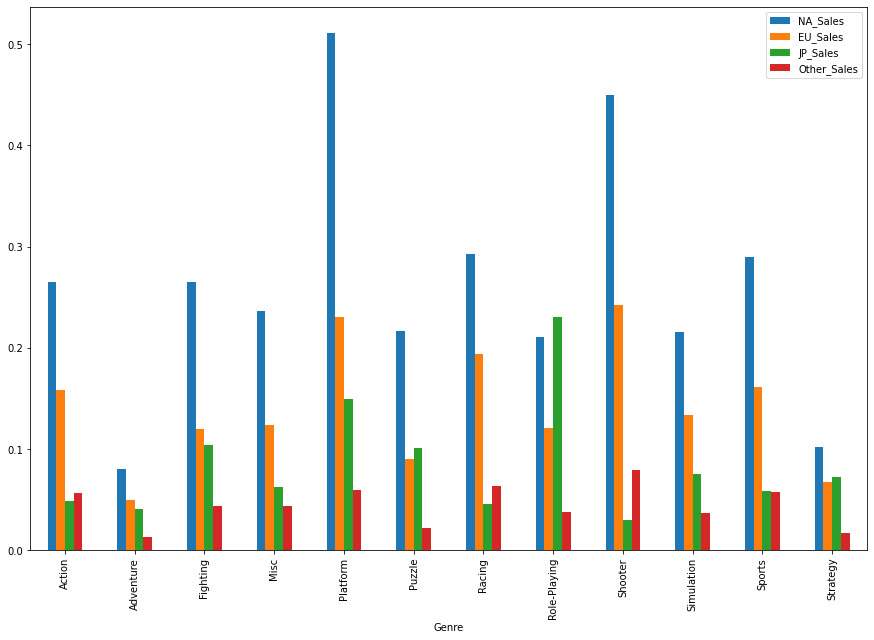

In [ ]:
# 위의 표를 막대그래프로 시각화 했다.
import matplotlib.pyplot as plt
df_genre.plot(kind="bar",figsize=(15,10))

In [ ]:
df_genre['NA_Sales'].sort_values(ascending = False)  
#북미지역에서 가장 인기 많은 장르는 Platform 장르 이다.

Genre
Platform        0.511514
Shooter         0.450229
Racing          0.292448
Sports          0.290227
Fighting        0.265513
Action          0.265332
Misc            0.235961
Puzzle          0.216846
Simulation      0.215268
Role-Playing    0.210762
Strategy        0.102139
Adventure       0.080166
Name: NA_Sales, dtype: float64

In [ ]:
df_genre['EU_Sales'].sort_values(ascending = False)  
#유럽지역에서 가장 인기 많은 장르는 Shooter 장르 이다.

Genre
Shooter         0.242319
Platform        0.230520
Racing          0.193714
Sports          0.161507
Action          0.158872
Simulation      0.133983
Misc            0.124285
Role-Playing    0.121009
Fighting        0.120290
Puzzle          0.090305
Strategy        0.067319
Adventure       0.050095
Name: EU_Sales, dtype: float64

In [ ]:
df_genre['JP_Sales'].sort_values(ascending = False)  
#일본지역에서 가장 인기 많은 장르는 Role-Playing 장르 이다.

Genre
Role-Playing    0.230782
Platform        0.149387
Fighting        0.104210
Puzzle          0.100699
Simulation      0.075458
Strategy        0.072485
Misc            0.062065
Sports          0.058794
Action          0.048273
Racing          0.045840
Adventure       0.040973
Shooter         0.029448
Name: JP_Sales, dtype: float64

In [ ]:
df_genre['Other_Sales'].sort_values(ascending = False)  
#기타지역에서 가장 인기 많은 장르는 Shooter 장르 이다.

Genre
Shooter         0.079511
Racing          0.063052
Platform        0.059133
Sports          0.057549
Action          0.056925
Fighting        0.043546
Misc            0.043411
Role-Playing    0.037550
Simulation      0.037146
Puzzle          0.022204
Strategy        0.016867
Adventure       0.013165
Name: Other_Sales, dtype: float64

# 북미지역 : Platform
# 유럽지역 : Shooter
# 일본지역 : Role-Playing
# 기타지역 : Shooter
## 북미, 일본은 서로 다르고, 유럽과 기타 지역은 같다.

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 총 판매량을 알기 위해 "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" 값들을 모두 더한값을 "All_Sales"라는 컬럼을 만들어서 값들을 저장했다.
import numpy as np
All = []
for i in range(df.shape[0]):
  All.append(df['NA_Sales'].iloc[i] + df['EU_Sales'].iloc[i] + df['JP_Sales'].iloc[i]+ df['Other_Sales'].iloc[i] )
df['All_Sales'] = np.array(All)

In [ ]:
df_all = df[['Year', 'Genre', 'All_Sales']]
df_all.sort_values(by = ['Year']).reset_index().drop(columns= 'index')

,Year,Genre,All_Sales
0,1980,Fighting,0.77
1,1980,Action,0.34
2,1980,Misc,1.05
3,1980,Misc,0.23
4,1980,Shooter,2.76
...,...,...,...
16136,2016,Adventure,0.02
16137,2017,Action,0.01
16138,2017,Role-Playing,0.03
16139,2017,Role-Playing,0.01


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       16141 non-null  int64  
 1   Genre      16141 non-null  object 
 2   All_Sales  16141 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 378.4+ KB


In [ ]:
'''
            <함수를 만들기 위한 점검 과정>
df_1980 = df_all.query('Year == 1980')
df_1980 = df_1980.groupby('Genre').sum()
df_1980 = df_1980.reset_index()
df_1980 = df_1980.sort_values(by = ['All_Sales'], ascending = False).reset_index()
df_1980 = df_1980[['Genre', 'All_Sales']]
df_1980['All_Sales'].mean()
df_1980['Genre'].iloc[0]
df_1980['All_Sales'].iloc[0]
'''

"\n            <함수를 만들기 위한 점검 과정>\ndf_1980 = df_all.query('Year == 1980')\ndf_1980 = df_1980.groupby('Genre').sum()\ndf_1980 = df_1980.reset_index()\ndf_1980 = df_1980.sort_values(by = ['All_Sales'], ascending = False).reset_index()\ndf_1980 = df_1980[['Genre', 'All_Sales']]\ndf_1980['All_Sales'].mean()\ndf_1980['Genre'].iloc[0]\ndf_1980['All_Sales'].iloc[0]\n"

## 트렌드를 파악하기위해 파악하기 쉬운 데이터를 만들고자 만든 함수이다
## query를 통해 연도별로 df_cal이라는 함수에 "Genre"을 기준으로 다른 함수들을 더한값을 만들었고, 그 값을 "All_Sales"를 기준으로 내림차순으로 정렬했다. 그리고 각각 "year(연도)", "genre(장르)", "mean("All_Sales"의 평균)", "max("All_Sales"의 평균)", "gap(max - mean)"이라는 리스트에 소수둘째점 자리까지만 저장하고, 각각을 컬럼으로 하는 데이터 프레임을 만들었다.

In [ ]:
year = []
genre = []
mean = []
max = []
gap = []
for i in range(1980, 2021):
  df_cal = df_all.query("Year == @i")
  if df_cal.shape[0] != 0:
    df_cal = df_cal.groupby(['Genre', 'Year']).sum()
    df_cal = df_cal.reset_index()
    df_cal = df_cal.sort_values(by = ['All_Sales'], ascending = False).reset_index()
    year.append(df_cal['Year'].iloc[0])
    genre.append(df_cal['Genre'].iloc[0])
    mean.append(round(df_cal['All_Sales'].mean(), 2))
    max.append(round(df_cal['All_Sales'].iloc[0], 2))
    gap.append(round(round(df_cal['All_Sales'].iloc[0], 2) - df_cal['All_Sales'].mean(), 2))

In [ ]:
trends = {'Year': year, 'Genre': genre, 'Mean': mean, 'Max' : max, 'Gap' : gap}

In [ ]:
data = pd.DataFrame(trends)

In [ ]:
data

,Year,Genre,Mean,Max,Gap
0,1980,Shooter,2.72,7.07,4.35
1,1981,Action,5.10,14.79,9.69
2,1982,Puzzle,4.13,10.04,5.91
3,1983,Platform,2.40,6.93,4.53
4,1984,Shooter,7.19,31.10,23.91
5,1985,Platform,7.71,43.17,35.46
6,1986,Action,6.00,13.74,7.74
7,1987,Fighting,3.10,5.42,2.32
8,1988,Platform,5.90,27.73,21.83
9,1989,Puzzle,10.49,37.75,27.26


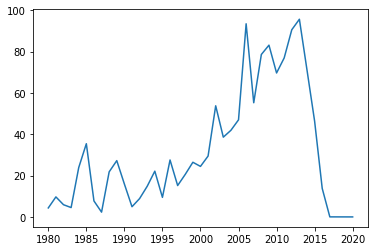

In [ ]:
plt.plot(data['Year'], data['Gap'])
plt.show()

### Year : 게임이 출시된 년도
### Genre : 장르
### Mean : 년도, 장르별 총 출고량의 평균
### Max : 년도, 장르별 출고량중 가장 높은 값
### Gap : 가장 높은 값과, 평균의 차이


## Gap의 크기가 클수록 한해 동안 특정 게임장르의 출고량이 많았다는 것이므로, 그만큼의 트렌드가 있었다고 볼수 있다.
## 시각화 한것을 보면 
## 대략 2000년도에서 부터 2015년도까지가 트렌드가 제일 크게 있었고, 
## 대략 2017년도 부터 2020년도 까지 트렌드가 제일 크게 없었다.

In [ ]:
# groupby를 사용할때 묶인것들의 개수를 편하게 알고싶어서 오로지 1만 들어가있는 "count" 라는 컬럼을 추가하였다.
ingredient = []
for i in range(16141):
  ingredient.append(1)

In [ ]:
df['count'] = np.array(ingredient)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,1
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,1
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,1
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,1
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,1
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,1
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,1
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,1


In [ ]:
# "Name"값만 추출해서 중복값이 어느정도 있는지 파악한다.
df['Name'].duplicated().sum()

4903

In [ ]:
df_du = df[['Name', 'count']]

In [ ]:
df_du = df_du.groupby('Name').sum().reset_index()
df_du = df_du.sort_values(by = 'count', ascending = False).reset_index()
df_du = df_du[['Name', 'count']]

In [ ]:
df_du

,Name,count
0,Need for Speed: Most Wanted,12
1,LEGO Marvel Super Heroes,9
2,FIFA 14,9
3,Ratatouille,9
4,LEGO The Hobbit,8
...,...,...
11233,Impossible Creatures,1
11234,In Cold Blood,1
11235,In The Groove,1
11236,In the Hunt,1


In [ ]:
df_du = df_du.query('count > 5')

In [ ]:
df_du

,Name,count
0,Need for Speed: Most Wanted,12
1,LEGO Marvel Super Heroes,9
2,FIFA 14,9
3,Ratatouille,9
4,LEGO The Hobbit,8
...,...,...
127,Star Wars: The Force Unleashed,6
128,Brunswick Pro Bowling,6
129,Pirates of the Caribbean: At World's End,6
130,The Simpsons Game,6


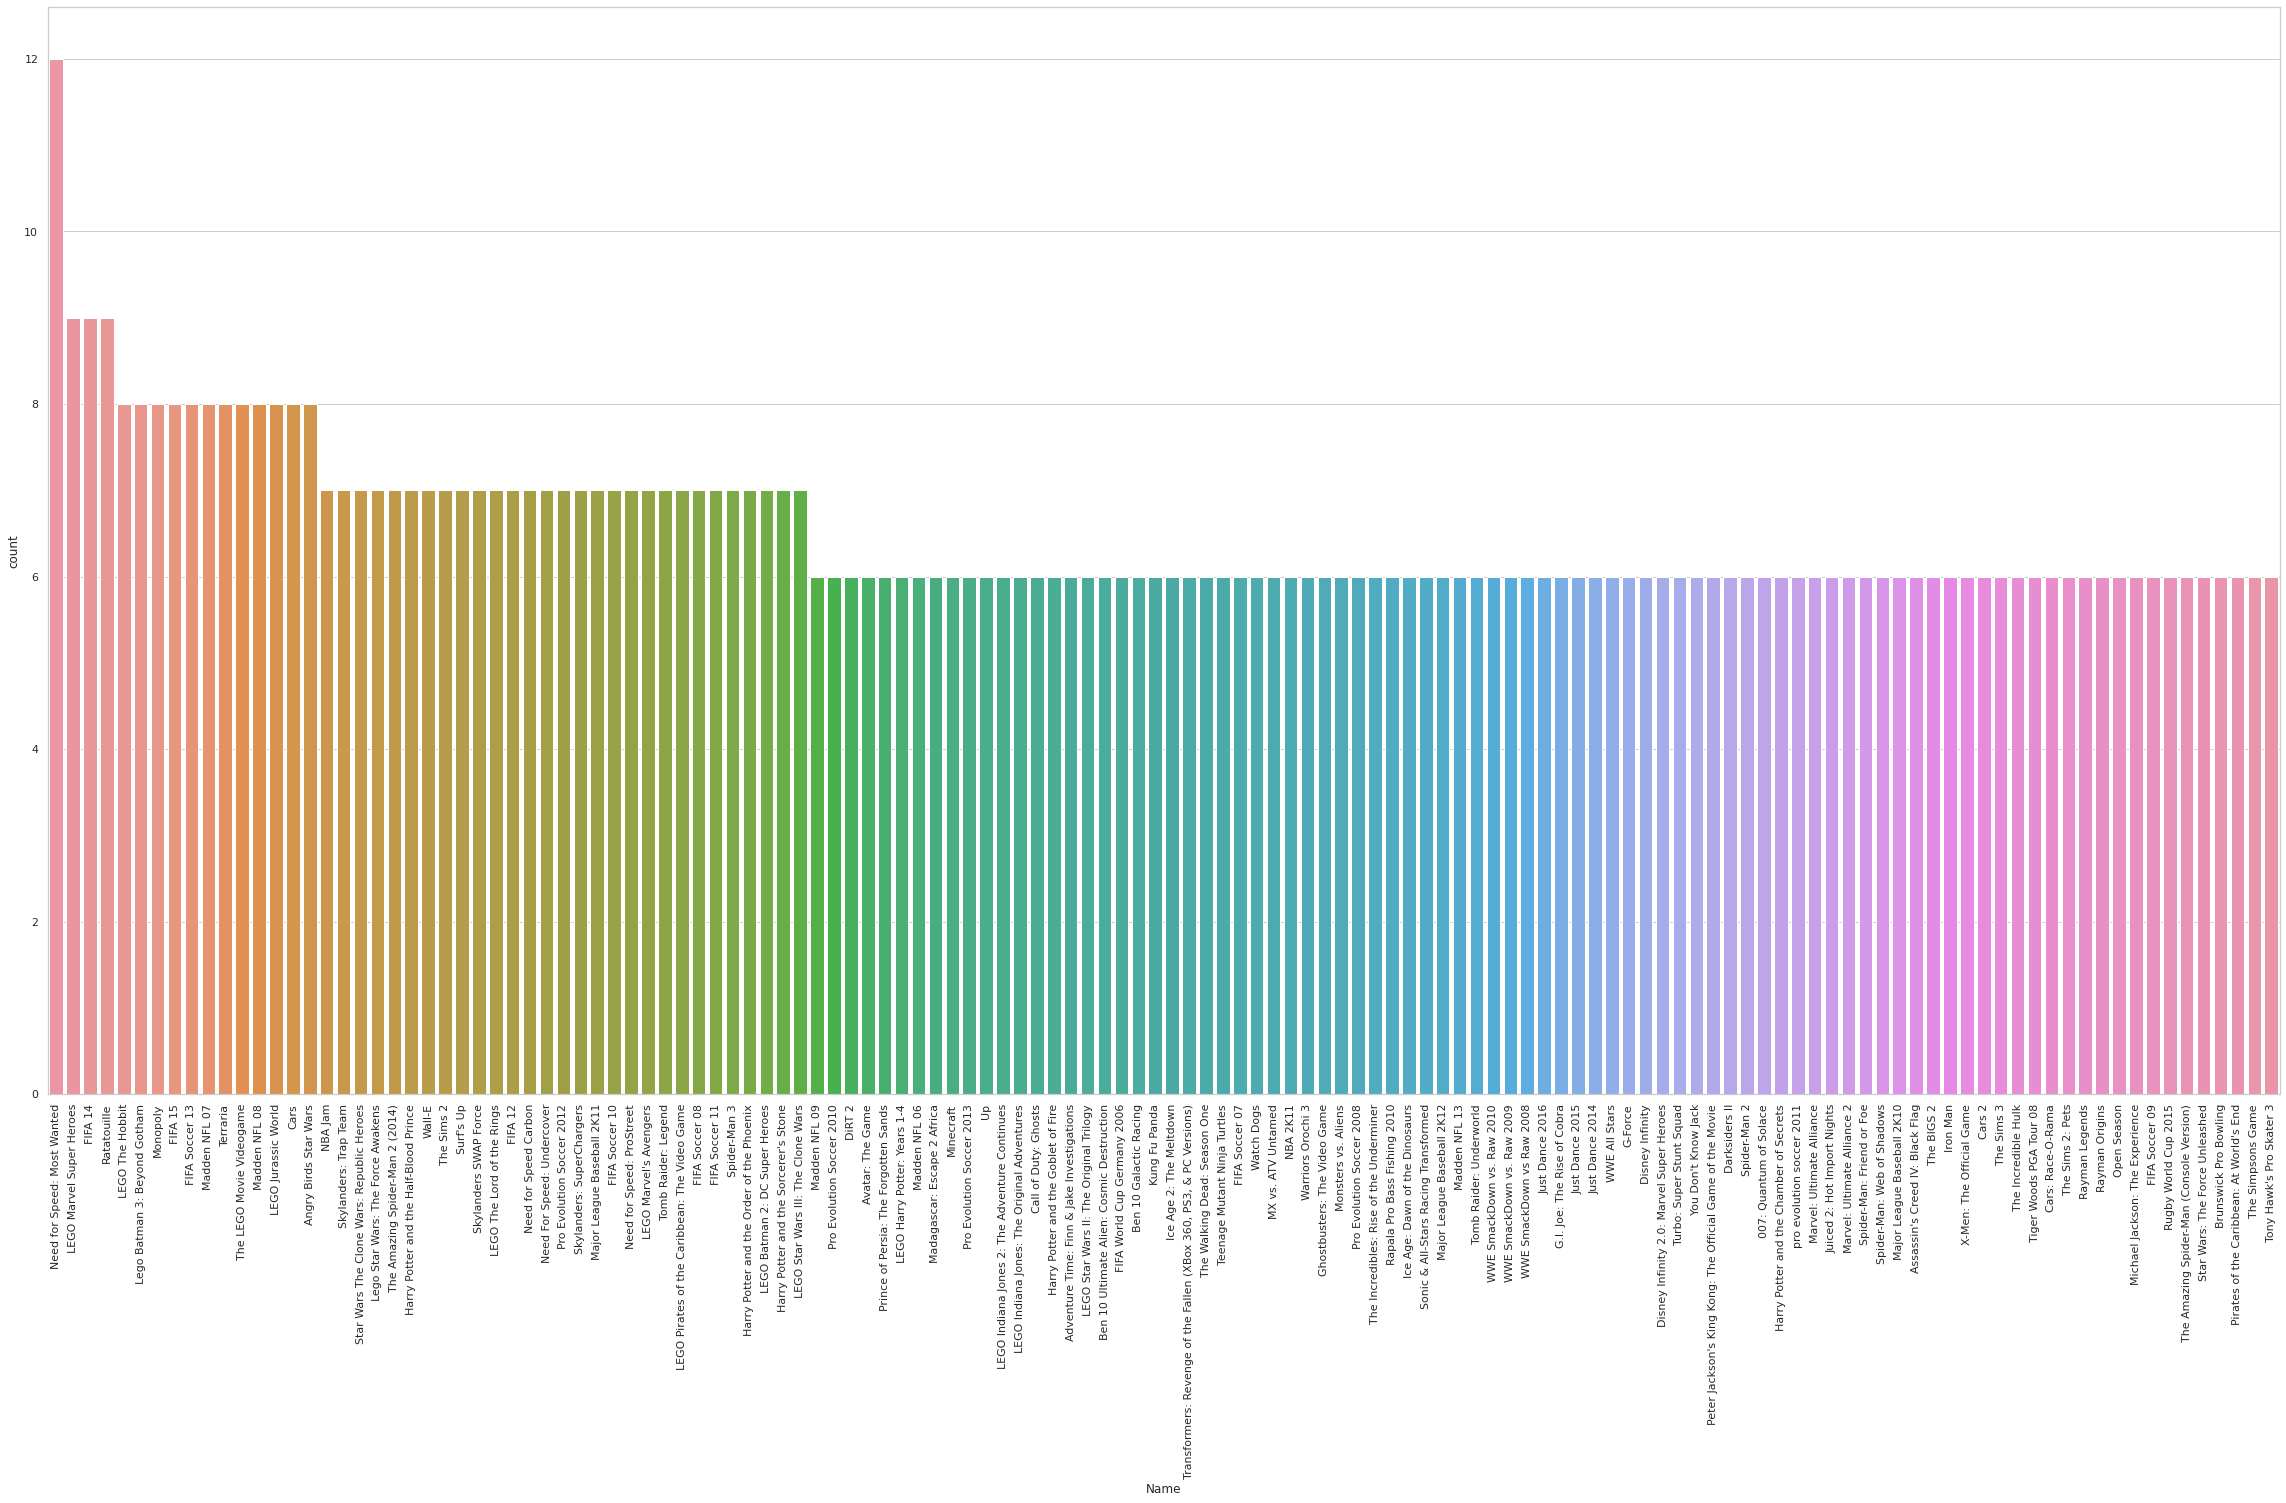

In [ ]:
#위의 표를 막대그래프로 시각화한것이다.
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize = (40,20))
ax = sns.barplot(x=df_du['Name'], y=df_du['count'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### df_du의 count컬럼의 개수가 같은 게임이 나온 횟수 이다. 나는 그 횟수가 많을수록 그 게임의 인기도가 높다고 판단했다
### 나는 그 횟수가 5회 이상인 데이터들만 추출했다.
### 따라서 가장 인기가 많은 게임은 <Need for Speed: Most Wanted>이 12번의 횟수의 출고로 인기가 가장 높다.

In [ ]:
df.sort_values(by = 'All_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
2838,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
4088,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
12237,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,1
3268,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
7626,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1
...,...,...,...,...,...,...,...,...,...,...,...
1372,Ultimate Puzzle Games,GBA,2005,Puzzle,Telegames,0.01,0.00,0.00,0.00,0.01,1
9159,Monster Rancher Advance 2,GBA,2002,Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01,1
8814,Myst,PSP,2006,Adventure,Midway Games,0.00,0.01,0.00,0.00,0.01,1
2907,Guild Wars: Factions,PC,2006,Role-Playing,NCSoft,0.00,0.01,0.00,0.00,0.01,1


In [ ]:
df_fu = df[['Year', 'All_Sales']]

In [ ]:
df_fu = df_fu.groupby('Year').sum().reset_index()

In [ ]:
df_fu

,Year,All_Sales
0,1980,10.88
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,36.03
7,1987,21.70
8,1988,47.21
9,1989,73.45


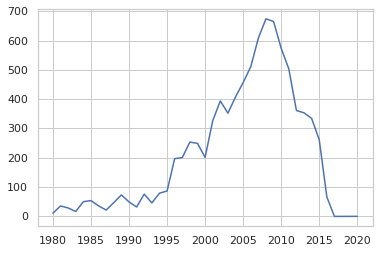

In [ ]:
plt.plot(df_fu['Year'], df_fu['All_Sales'])
plt.show()

In [ ]:
df_si = df.sort_values(by = 'All_Sales', ascending = False).reset_index()
df_si

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
0,2838,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,4088,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,12237,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,1
3,3268,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,7626,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16136,1372,Ultimate Puzzle Games,GBA,2005,Puzzle,Telegames,0.01,0.00,0.00,0.00,0.01,1
16137,9159,Monster Rancher Advance 2,GBA,2002,Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01,1
16138,8814,Myst,PSP,2006,Adventure,Midway Games,0.00,0.01,0.00,0.00,0.01,1
16139,2907,Guild Wars: Factions,PC,2006,Role-Playing,NCSoft,0.00,0.01,0.00,0.00,0.01,1


In [ ]:
df_pu = df[['Publisher', 'All_Sales']]
df_pu = df_pu.groupby('Publisher').sum().reset_index()
df_pu = df_pu.sort_values(by = 'All_Sales', ascending = False).reset_index()
df_pu = df_pu[['Publisher', 'All_Sales']]
df_pu = df_pu.query('All_Sales > 100')
df_pu

,Publisher,All_Sales
0,Nintendo,1744.06
1,Electronic Arts,1084.10
2,Activision,719.08
3,Sony Computer Entertainment,594.92
4,Ubisoft,472.03
5,Take-Two Interactive,395.87
6,THQ,338.85
7,Konami Digital Entertainment,277.61
8,Sega,268.78
9,Namco Bandai Games,250.83


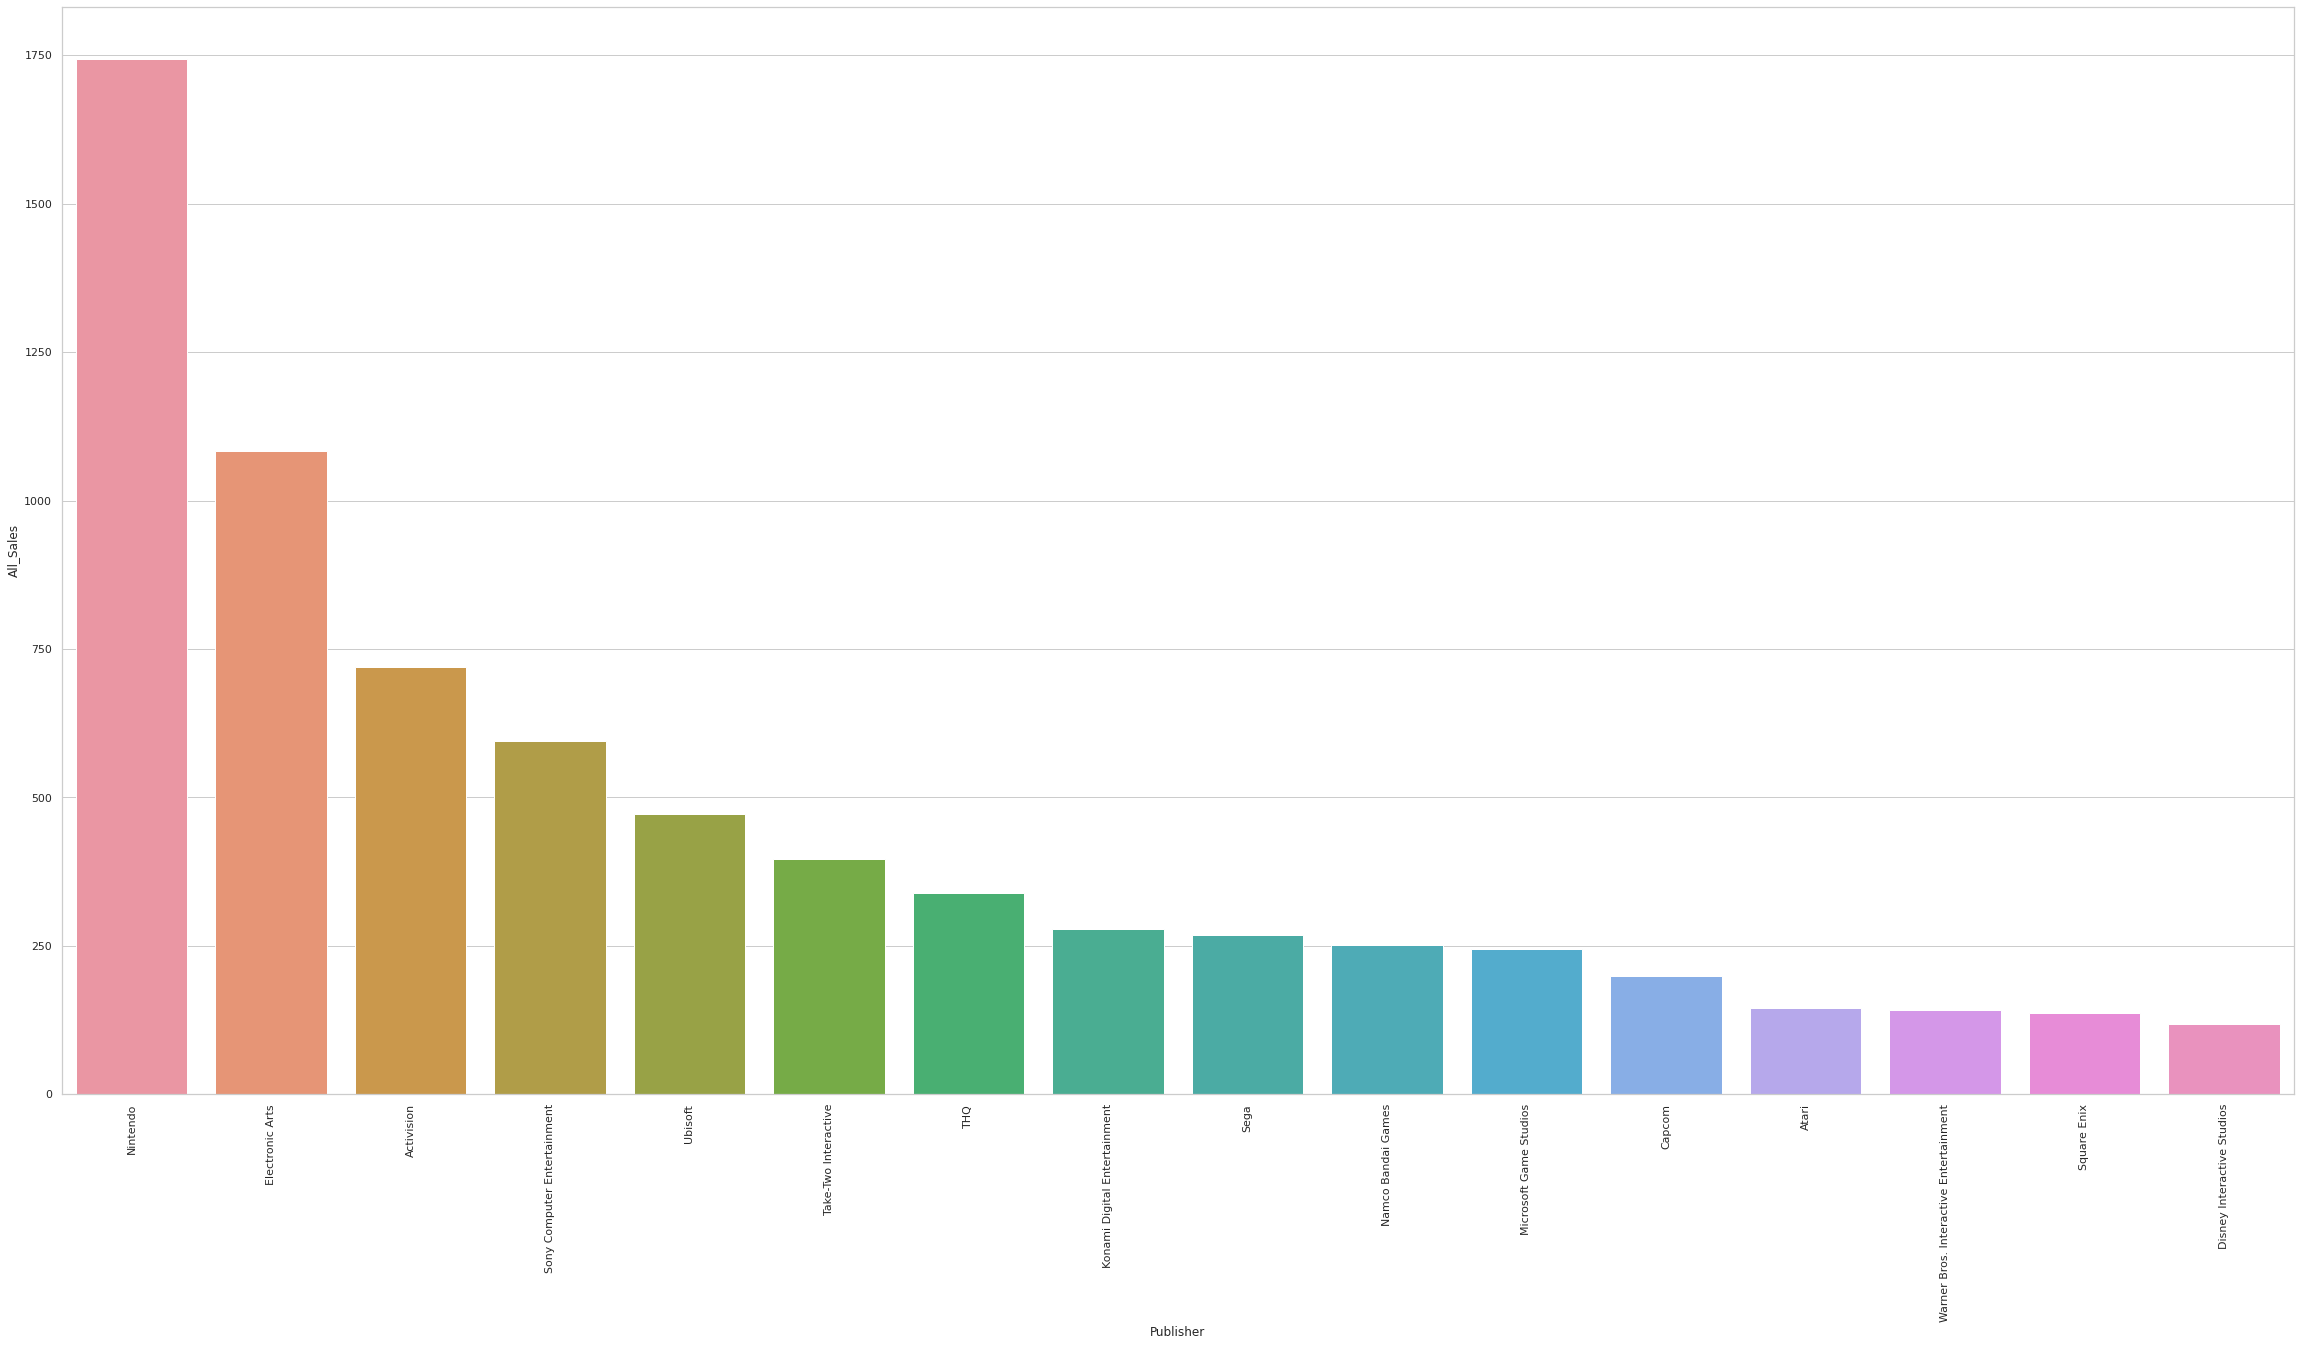

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (40,20))
px = sns.barplot(x=df_pu['Publisher'], y=df_pu['All_Sales'])
px.set_xticklabels(px.get_xticklabels(),rotation = 90)
plt.show()

### 회사별 출고량을 시각화 해봤다. 나는 그 회사의 총 출고량에 따라 회사의 규모를 파악했다. 동시에, 회사의 출고량이 높다는 뜻은 그만큼 대중적인 인기가 있다고 봐도 무방할 것이다. 회사별 총 출고량이 100이 넘는 회사만 시각화를 했고, 그중에는 Nintendo, Electronic Arts이 총 출고량이 1000이 넘는 압도적이 결과를 도출 해냈다. 
### 위에 연도별 출고량을 시각화했을때, 1995년도 부터 2010년도까지는 총 출고량이 점점 상승하지만 2010년도 부터는 점점 하강하는 추세를 보이다가, 대략 2017년도 부터는 그래프가 보이지 않을정도로 출고량이 감소했다. 하지만 그래프상으로 이렇게 큰 폭으로 그래프의 상승과 하강을 한것이 한번밖에 없으므로, 다음에 상승하는 추세가 언제쯤 올것인지는 예측하기 힘들다.

### 따라서 다음에 게임을 출시하는 분기는 예측 불가능하고, 출고량이 높은 게임을 출시하려면 Nintendo, Electronic Arts의 버금가는 규모와 인기의 회사가 유리할것이다. 


In [ ]:
df.groupby('Year').sum().reset_index()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
0,1980,10.13,0.64,0.00,0.11,10.88,8
1,1981,33.40,1.96,0.00,0.32,35.68,46
2,1982,26.92,1.65,0.00,0.31,28.88,36
3,1983,7.76,0.80,8.10,0.14,16.80,17
4,1984,33.28,2.10,14.27,0.70,50.35,14
5,1985,33.73,4.74,14.56,0.92,53.95,14
6,1986,12.50,2.84,18.76,1.93,36.03,20
7,1987,8.46,1.41,11.63,0.20,21.70,16
8,1988,23.87,6.59,15.76,0.99,47.21,15
9,1989,45.15,8.44,18.36,1.50,73.45,17


In [ ]:
df.query('Year > 2007').groupby('Genre').sum().reset_index().sort_values(by = 'count', ascending = False)

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
0,Action,3856375,429.70,312.41,87.59,112.80,942.50,1917
3,Misc,1947906,211.41,105.59,34.09,39.88,390.97,969
10,Sports,1908047,272.69,184.19,30.34,68.01,555.23,949
1,Adventure,1693113,43.79,30.22,22.91,9.39,106.31,842
7,Role-Playing,1536771,135.03,82.58,124.09,30.17,371.87,764
8,Shooter,1128264,298.86,201.05,15.21,70.18,585.30,561
9,Simulation,892411,70.61,48.89,17.73,13.27,150.50,444
6,Racing,796201,94.04,92.90,11.36,30.01,228.31,396
2,Fighting,609306,74.10,35.35,22.49,16.28,148.22,303
11,Strategy,562945,22.70,21.29,10.01,5.56,59.56,280


In [ ]:
df.query('Year > 1995 and Year < 2000').groupby('Genre').sum().reset_index().sort_values(by = 'count', ascending = False)

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
10,Sports,457456,63.10,26.48,24.56,5.25,119.39,229
6,Racing,303669,67.51,36.22,13.85,5.17,122.75,152
0,Action,263706,59.80,36.17,12.97,5.91,114.85,132
2,Fighting,245690,40.09,17.15,15.73,2.86,75.83,123
7,Role-Playing,217735,43.92,31.67,59.68,5.87,141.14,109
11,Strategy,185795,18.52,8.67,15.98,1.57,44.74,93
8,Shooter,177765,31.66,13.73,3.93,1.77,51.09,89
3,Misc,161805,24.79,10.60,11.65,1.82,48.86,81
4,Platform,147824,53.95,26.64,15.42,3.81,99.82,74
1,Adventure,143829,9.25,6.93,7.67,1.13,24.98,72


In [ ]:
df.query('Year < 2007 and Year > 2000').groupby('Genre').sum().reset_index().sort_values(by = 'count', ascending = False)

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
0,Action,1667291,239.30,119.19,30.78,46.77,436.04,832
10,Sports,1536680,239.77,117.48,29.24,40.91,427.40,767
6,Racing,1001705,146.40,79.68,14.27,31.90,272.25,500
8,Shooter,877645,139.66,61.46,5.62,18.54,225.28,438
3,Misc,819745,94.47,62.65,33.80,17.84,208.76,409
4,Platform,809439,136.23,64.78,26.34,16.88,244.23,404
7,Role-Playing,763531,97.93,49.03,72.94,11.66,231.56,381
2,Fighting,504953,69.26,30.10,16.03,10.37,125.76,252
1,Adventure,448926,24.55,13.46,9.32,3.28,50.61,224
9,Simulation,406808,64.02,40.34,17.96,10.83,133.15,203


In [ ]:
df.query('Year < 2008').groupby('Genre').sum().reset_index().sort_values(by = 'count', ascending = False)

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count
10,Sports,2682513,391.64,185.50,104.24,63.72,745.10,1340
0,Action,2621143,426.26,200.11,68.14,70.84,765.35,1309
6,Racing,1627659,259.53,141.30,44.06,46.22,491.11,813
8,Shooter,1415222,272.03,106.21,22.13,30.64,431.01,707
3,Misc,1406266,182.88,102.09,69.62,32.66,387.25,702
7,Role-Playing,1387486,172.05,93.73,212.16,24.54,502.48,693
4,Platform,1250732,349.24,138.38,106.27,31.01,624.90,625
2,Fighting,1052524,146.01,64.37,63.90,19.82,294.10,526
1,Adventure,845167,57.54,33.10,28.88,7.25,126.77,422
9,Simulation,795092,110.43,63.79,45.73,17.97,237.92,397


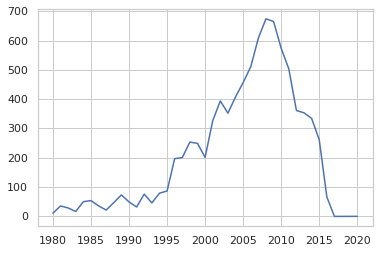

In [ ]:
plt.plot(df_fu['Year'], df_fu['All_Sales'])
plt.show()

# 2007년도 부터 게임이 하락세를 보인 이유를 위의 그래프로 추축해보았다.

### 2007년도 부터 총 출고량의 그래프가 하강하는 이유를 찾아보았다.
### 1995년도부터 Action,장르가 Sports장르와 함께 높은 출고량을 자랑하다가, 대략 1998년도 부터 2000년도 까지 총 출고량의 하락세를 보인다
### 2007년도 전까진 상승세가 아니였던 Action장르가, 2007년도에 출고량의 압도적인 1위로 올라가면서, 총 출고량의 최정점을 찍었다
### 그에따라 Action장르의 출고가 많아진다
### 하락세의 시작점인 2007년도 부터는 Action장르의 출고량이 다른 장르보다 압도적으로 많아지기 시작한다.
### 그에따라 다양한 장르의 게임이 점점 사라지기 시작하고, 같은 장르에 질린 사람들이 점점 떠나가기 시작해서 모든 게임의 출고량이 바닥을 친것으로 보인다.
### 다시 상승세를 보이려면, 한 장르에 몰두하지말고, 다양한 장르를 출시해야 할것으로 보인다.